#### libraries

In [1]:
                                    ########### VISUALIZATION TOOLS ###########

%matplotlib inline
import matplotlib.pyplot as plt                  # basic plotting
import matplotlib.ticker as mtick                 # axis tick formatting
from matplotlib import colormaps as cm            # colormaps
import matplotlib.patches as mpatches             # patch shapes
from matplotlib.patches import Patch              # patch base class

import seaborn as sns                             # statistical data visualization
import warnings                                   # warning control
warnings.filterwarnings("ignore", category=UserWarning)  # ignore seaborn UserWarnings

import plotly.express as px                       # interactive plots (express interface)
import plotly.graph_objects as go                  # interactive plots (graph objects)

import folium                                    # interactive maps
from folium import plugins                        # folium plugins
from folium import Choropleth                      # choropleth maps

from IPython.display import display, IFrame, HTML  # display rich content in notebooks
from IPython import display as ipythondisplay

from tqdm.notebook import tqdm                    # progress bars for notebook loops

import wordcloud                                 # word cloud visualization
from wordcloud import WordCloud, STOPWORDS        # word cloud generator and stopwords

                                    ########### VECTORS AND MATRICES ###########

import numpy as np                               # numerical arrays and matrix operations
import pandas as pd                              # data manipulation and analysis

                                    ########### SCIPY ###########

from scipy import stats                           # statistical functions

                                    ########### SCIKIT-LEARN ###########


from sklearn.preprocessing import (
    StandardScaler,      # z-score normalization
    normalize,           # row-wise normalization
    PolynomialFeatures,  # polynomial regression features
    OneHotEncoder,       # one-hot encoding categorical features
    LabelEncoder,        # label encoding for target
    label_binarize       # multi-label one-hot encoding
)

from sklearn.linear_model import (
    LinearRegression,    # ordinary least squares regression
    Ridge,               # ridge regression (L2 regularization)
    Lasso,               # lasso regression (L1 regularization)
    LogisticRegression   # logistic regression for classification
)

from sklearn.tree import (
    DecisionTreeClassifier,  # classification trees
    DecisionTreeRegressor,   # regression trees
    plot_tree                # visualize decision trees
)

from sklearn.svm import (
    LinearSVC,  # linear support vector classifier
    SVC         # kernelized SVM classifier
)

from sklearn.neighbors import KNeighborsClassifier  # k-nearest neighbors

from sklearn.cluster import KMeans               # k-means clustering

from sklearn.ensemble import (
    RandomForestRegressor,    # ensemble regression method
    RandomForestClassifier    # ensemble classification method
)

from sklearn.metrics import (
    mean_squared_error,      # MSE regression metric
    r2_score,               # R-squared metric
    log_loss,               # cross-entropy loss
    mean_absolute_error,    # MAE metric
    root_mean_squared_error,# RMSE metric
    confusion_matrix,       # confusion matrix
    ConfusionMatrixDisplay, # plot confusion matrix
    accuracy_score,         # classification accuracy
    roc_auc_score,          # ROC AUC metric
    classification_report,  # detailed classification metrics report
    silhouette_score, silhouette_samples, davies_bouldin_score,  # clustering quality metrics
    explained_variance_score, # explained variance regression metric
    roc_curve, auc
)

from sklearn.pipeline import Pipeline           # pipeline for chaining transforms and estimators

from sklearn.model_selection import (
    train_test_split,       # split data into train/test sets
    cross_val_score,        # k-fold cross-validation scores
    cross_val_predict,      # k-fold cross-validation predictions
    StratifiedKFold,        # stratified k-fold cross-validation
    GridSearchCV            # grid search hyperparameter tuning
)

from sklearn.multiclass import OneVsOneClassifier  # multiclass classification using binary classifiers

from sklearn.utils.class_weight import compute_sample_weight  # compute sample weights for imbalanced data

from sklearn.decomposition import PCA              # principal component analysis

from sklearn.compose import ColumnTransformer       # apply different transformations to columns

from sklearn.impute import SimpleImputer             # missing value imputation

#from umap.umap_ import UMAP                          # UMAP dimensionality reduction (commented out)

from sklearn.manifold import TSNE                     # t-SNE dimensionality reduction

from sklearn.datasets import (
    make_blobs,              # synthetic cluster dataset generator
    make_classification,     # synthetic classification dataset generator
    load_diabetes,           # diabetes dataset
    load_breast_cancer,      # breast cancer dataset
    load_iris,               # iris dataset
    fetch_california_housing # california housing dataset
)
diabetes = load_diabetes()
cancers = load_breast_cancer()
iris = load_iris()
cal_housing = fetch_california_housing()

                                    ########### ENSEMBLE METHODS ###########

from xgboost import XGBRegressor                   # extreme gradient boosting regressor

                                    ########### PYTORCH ###########

import torch                                        # core PyTorch
from torch import nn                               # neural network modules
from torch import optim                            # optimizers
import torch.nn.functional as functional           # functional interface for NN ops
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset  # data utilities
from torchvision.utils import make_grid             # visualize image grids
import torchvision                                  # computer vision models and datasets
import torchvision.transforms as transforms         # image transforms pipeline
from torchvision import datasets                     # image datasets
from torch.utils.data import Subset                  # subset of datasets
import torchvision.models as models                  # pretrained models

import albumentations as albuments                   # advanced data augmentation

from torchsummary import summary                     # model summary

import timm                                         # PyTorch Image Models (SOTA model zoo)

                                    ########### IMAGES ###########

import os                                           # filesystem operations
from PIL import Image, ImageFile                     # image loading and processing

from copy import copy                                # shallow copy
import operator                                     # functional tools for operators
import sys                                          # system-specific parameters and functions

import cv2                                          # OpenCV for image processing

                                    ########### SCRAPING ###########

import urllib                                        # URL handling
import requests                                     # HTTP requests
import io                                           # streams and bytes IO
from io import StringIO                             # string stream for IO

from bs4 import BeautifulSoup                        # HTML/XML parsing

import json                                         # JSON parsing
import xml.etree.ElementTree as ET                   # XML parsing

                                    ########### MISC ###########
                                    
import gymnasium                                    # reinforcement learning environments
from gymnasium.wrappers import RecordVideo          # video recording wrapper for gymnasium envs

import glob                                         # Unix style pathname pattern expansion
import base64                                       # base64 encoding/decoding

import random                                       # random number generators
import time                                         # time-related functions
import datetime                                     # date and time functions

import re                                           # regular expressions
import unicodedata                                  # Unicode character database

import shutil                                       # high-level file operations
from pathlib import Path                            # filesystem path manipulations

from collections import namedtuple, deque          # advanced data structures


# Dataset and preprocessing

## Dataset

In [2]:
#create an hidden directory .kaggle (which is fundamental for using the library kaggle), then move the kaggle.json from the
#folder I created (KAGGLE) to the standard .kaggle
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
kaggle_json_path = os.path.expanduser('~/Desktop/programmazione/KAGGLE/kaggle.json') 
shutil.copy(kaggle_json_path, os.path.expanduser('~/.kaggle/kaggle.json'))
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600) #set the correct premission

#download and unzip the dataset we want
!kaggle datasets download uciml/breast-cancer-wisconsin-data --force
!unzip -o breast-cancer-wisconsin-data.zip -d breast_cancer #the unzipped content is saved in the directory animal_dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0%|                                               | 0.00/48.6k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 48.6k/48.6k [00:00<00:00, 42.7MB/s]
Archive:  breast-cancer-wisconsin-data.zip
  inflating: breast_cancer/data.csv  


In [3]:
data = pd.read_csv('/Users/alex/Desktop/programmazione/notebooks/My notebooks/My tutorials/breast_cancer/data.csv')
data = data.drop(columns = ['id','Unnamed: 32'])
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")
data.head()

There are 569 rows and 31 columns.


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The dataset has 10 parameters, repeated in feature_mean, feature_se (standard error), feature_worst plus the target, which is 'diagnosis':

In [4]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Are there missing values? No:

In [5]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Assign target variable and input variables:

In [6]:
y = data['diagnosis']
X = data.drop (columns = ['diagnosis'], axis = 1)

The tartget variable is **unbalanced**:

In [7]:
numb_neg = y.value_counts()['B']
numb_pos = y.value_counts()['M']
tot = numb_neg + numb_pos

print(f"There are {numb_neg} benign ({numb_neg/tot}%) and {numb_pos} malign ({numb_pos/tot}%).")

There are 357 benign (0.6274165202108963%) and 212 malign (0.37258347978910367%).


We treat this problem by keeping only 'keep_number' cases (randomly chosen) for each class:

In [8]:
data_unified = pd.concat([X, y], axis=1)
keep_number = 212

# Separate the two classes
data_B = data_unified[data_unified['diagnosis'] == 'B']
data_M = data_unified[data_unified['diagnosis'] == 'M']

# Select 200 samples from each class
data_B = data_B.sample(n = keep_number, random_state = 42)
data_M = data_M.sample(n = keep_number, random_state = 42)
# Combine the two classes
balanced_data = pd.concat([data_B, data_M])

print(balanced_data['diagnosis'].value_counts())

diagnosis
B    212
M    212
Name: count, dtype: int64


In [9]:
y = balanced_data['diagnosis']
X = balanced_data.drop (columns = ['diagnosis'], axis = 1)

## Preprocessing

First we want the target in a form of a label, instead of 'M' and 'B'. Here we could use 
```
le = LabelEncoder()
le.fit(y)
pd.DataFrame(le.transform(y))
```
but it simpler to do:

In [10]:
y = y.map({'B': 0, 'M': 1})
y.head()

395    0
110    0
481    0
493    0
136    0
Name: diagnosis, dtype: int64

Now we can split X and y in train and test; `stratify = y` is not really necessary since we have balanced the dataset!

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

It is now time to scale the features for example because 'perimeter_mean' is un range of 1000 and 'radium_mean' is in range of 10:

In [12]:
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

Check the action of the scaler:

In [13]:
print(X_train.mean(axis = 0)) # null
print(X_test.mean(axis = 0)) #small but non-null

[-3.01299464e-16 -2.09599627e-16  5.42339035e-16  1.72919692e-16
 -1.01655819e-15  1.02179818e-16  4.19199254e-17 -4.71599161e-17
  9.77258261e-16  4.46709205e-16  8.38398508e-17  2.20079608e-16
  3.66799347e-17 -8.38398508e-17  2.50209555e-16  1.67679702e-16
 -1.04799814e-17 -2.72479515e-16 -1.04799814e-17 -1.36239758e-16
  1.83399674e-16 -3.40599394e-16  5.08279096e-16 -2.61999534e-17
 -7.85998602e-17  6.81198788e-17 -3.14399441e-17  2.09599627e-16
  5.31859054e-16  5.23999068e-17]
[ 0.07743836  0.10252534  0.07522248  0.06746707 -0.03583196  0.01357444
  0.01359103  0.00838398 -0.01852406 -0.02336292 -0.03149059  0.02942259
 -0.01482312 -0.01451206 -0.06510139 -0.01389316  0.0169887  -0.06649601
 -0.12394079 -0.03112959  0.09665937  0.11779993  0.09746415  0.10353684
  0.001487    0.0107677   0.04869442  0.02788199  0.02272527  0.01229128]


# Machine Learning

We can now use the logistic classifier of scikit learn:

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
yhat_train = lr.predict(X_train) # Numpy array of 1/0

yhat_test = lr.predict(X_test)

The accuracy on the training set and test set are:

In [15]:
# train
accuracy_manual = (yhat_train == y_train).sum()/y_train.shape[0]*100
accuracy_scikit = accuracy_score(yhat_train, y_train)*100
print(f"The train (manual) accuracy is {accuracy_manual}%, or {accuracy_scikit}% from scikit learn.")
# test
accuracy_manual = (yhat_test == y_test).sum()/y_test.shape[0]*100
accuracy_scikit = accuracy_score(yhat_test, y_test)*100
print(f"The train (manual) accuracy is {accuracy_manual}%, or {accuracy_scikit}% from scikit learn.")

The train (manual) accuracy is 98.52507374631269%, or 98.52507374631269% from scikit learn.
The train (manual) accuracy is 95.29411764705881%, or 95.29411764705881% from scikit learn.


A more detailled report of the scores of our classifier is:

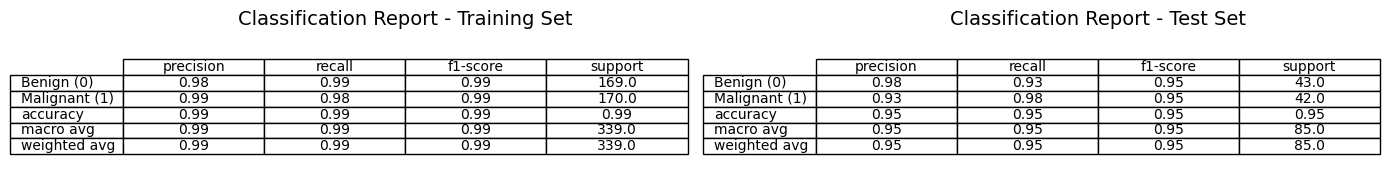

In [16]:
labels = lr.classes_.tolist()
classes = ['Benign (0)', 'Malignant (1)']

report_train = classification_report(
    y_train,
    yhat_train,
    labels = labels,
    target_names = classes,
    output_dict = True #to produce a dict
)

report_test = classification_report(
    y_test,
    yhat_test,
    labels = labels,
    target_names = classes,
    output_dict = True
)

# Convert to DataFrames
df_train = pd.DataFrame(report_train).transpose().round(2)
df_test = pd.DataFrame(report_test).transpose().round(2)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 2))

for ax, df, title in zip(axes, [df_train, df_test], ['Training Set', 'Test Set']):
    ax.axis('off')
    table = ax.table(cellText = df.values,
                     rowLabels = df.index,
                     colLabels = df.columns,
                     cellLoc = 'center',
                     loc = 'center')
    ax.set_title(f'Classification Report - {title}', fontsize=14)

plt.tight_layout()
plt.show()

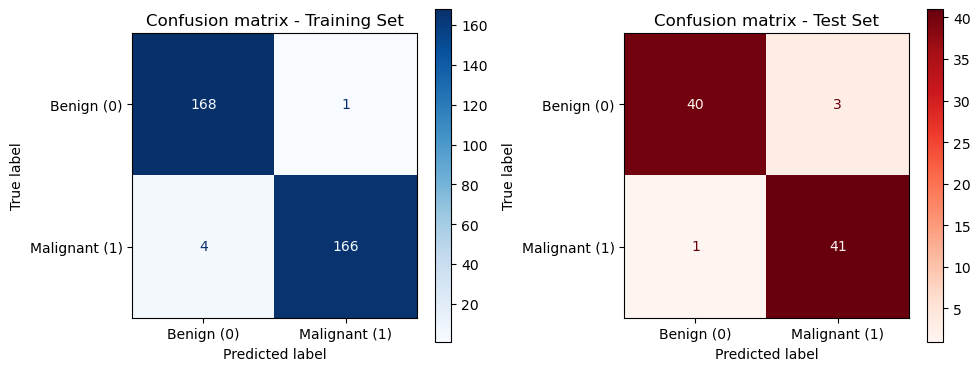

In [17]:
cm_train = confusion_matrix(y_train, yhat_train)
cm_test = confusion_matrix(y_test, yhat_test)

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))

# Plot training confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = classes)
disp_train.plot(ax = axes[0], cmap = plt.cm.Blues, colorbar = True)
axes[0].set_title('Confusion matrix - Training Set')

# Plot test confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = classes)
disp_test.plot(ax = axes[1], cmap = plt.cm.Reds, colorbar = True)
axes[1].set_title('Confusion matrix - Test Set')

plt.tight_layout()
plt.show()


The typeII errors (false-negatives), the worst ones, are worse in the Training set (4).

# Deep Learning

Hyperparameters:

In [18]:
BATCH_SIZE = 5
output_dim = y.nunique() # 2
input_dim = X.shape[1] # 30 
HIDDEN_DIM = 16 # In a preceeding run, with 64 hidden neurons, we obtained overfit!
LR = 0.0005 # this gives the highest 
EPOCHS = 30

We now try deep learning. We start from the same `X_train`and so on and we move them to be PyTorch tensors to build datasets and loaders:

In [19]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_train = torch.tensor(y_train.values, dtype = torch.long)
y_test = torch.tensor(y_test.values, dtype = torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False)

## Model architecture

In [20]:
class ClassificationNet(nn.Module):
    def __init__(self, input_units=30, hidden_units=64, output_units=2):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_units)

    def forward(self, input): # input will be of the form (BATCH_SIZE, input_dim)
        first_layer = self.fc1(input)
        first_activation = torch.relu(first_layer)
        output = self.fc2(first_activation)
        return output

# How to instantiate the model
model = ClassificationNet(input_units = input_dim, hidden_units = HIDDEN_DIM, output_units = output_dim)

print(model)

summary(model, input_size = (BATCH_SIZE, input_dim))

ClassificationNet(
  (fc1): Linear(in_features=30, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=2, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 5, 16]             496
            Linear-2                 [-1, 5, 2]              34
Total params: 530
Trainable params: 530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## Accuracy

In [ ]:
def accuracy_of_model(model, train_loader, test_loader):
    correct_train, correct_test = 0, 0
    
    with torch.no_grad():
        for x_train, y_train in train_loader:
            out_vector = model(x_train)  # Shape: (BATCH_SIZE, 2)
            y_pred = torch.argmax(out_vector, dim=1)  # Predicted class index
            correct_train += (y_pred == y_train).sum().item() #here we could have used accuracy_score of scikit learn, again
        
        for x_test, y_test in test_loader:
            out_vector = model(x_test)
            y_pred = torch.argmax(out_vector, dim=1)
            correct_test += (y_pred == y_test).sum().item()
    
    acc_train = correct_train / len(train_loader.dataset) * 100
    acc_test = correct_test / len(test_loader.dataset) * 100
    return acc_train, acc_test


accuracy_of_model(model, train_loader, test_loader)

(52.8023598820059, 61.1764705882353)

## Training

In [22]:
model = ClassificationNet(input_units = input_dim, hidden_units = HIDDEN_DIM, output_units = output_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = LR)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in tqdm(range(EPOCHS)):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    train_acc, test_acc = accuracy_of_model(model, train_loader, test_loader)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

print(f"Train: last loss {train_losses[-1]} | last accuracy {train_accuracies[-1]}.\n")
print(f"Test: last loss {test_losses[-1]} | last accuracy {test_accuracies[-1]}.")


  0%|          | 0/30 [00:00<?, ?it/s]

Train: last loss 0.05681087965357994 | last accuracy 98.82005899705014.

Test: last loss 0.09630504206014688 | last accuracy 96.47058823529412.


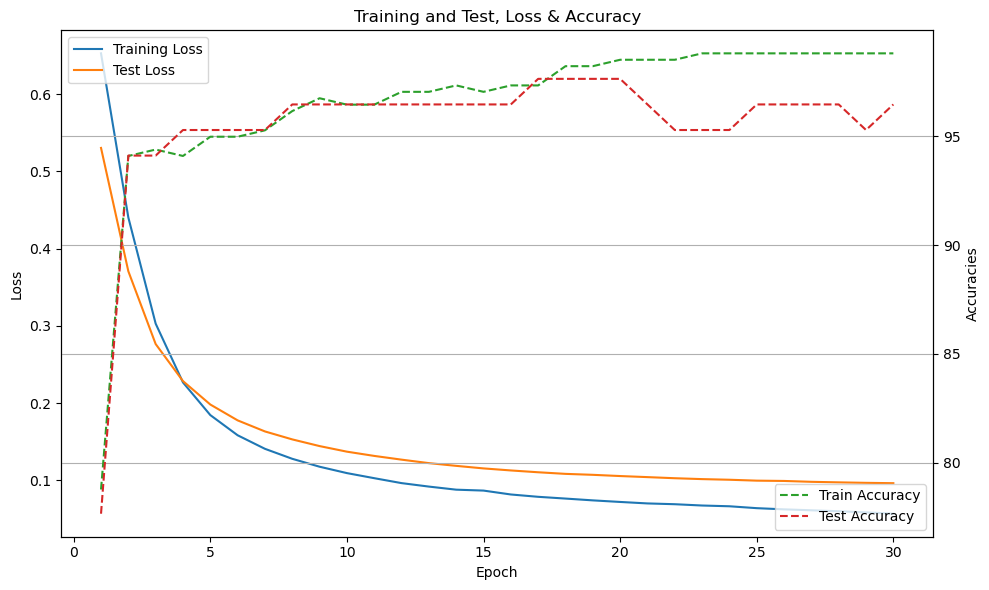

In [23]:
plt.figure(figsize=(10, 6))

# left
ax1 = plt.gca()
ax1.plot(range(1, EPOCHS + 1), train_losses, label='Training Loss', color='tab:blue')
ax1.plot(range(1, EPOCHS + 1), test_losses, label='Test Loss', color='tab:orange')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# rught
ax2 = ax1.twinx()
ax2.plot(range(1, EPOCHS + 1), train_accuracies, label='Train Accuracy', color='tab:green', linestyle='--')
ax2.plot(range(1, EPOCHS + 1), test_accuracies, label='Test Accuracy', color='tab:red', linestyle='--')
ax2.set_ylabel('Accuracies')
ax2.tick_params(axis='y')
ax2.legend(loc='lower right')

plt.title('Training and Test, Loss & Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualization of the results

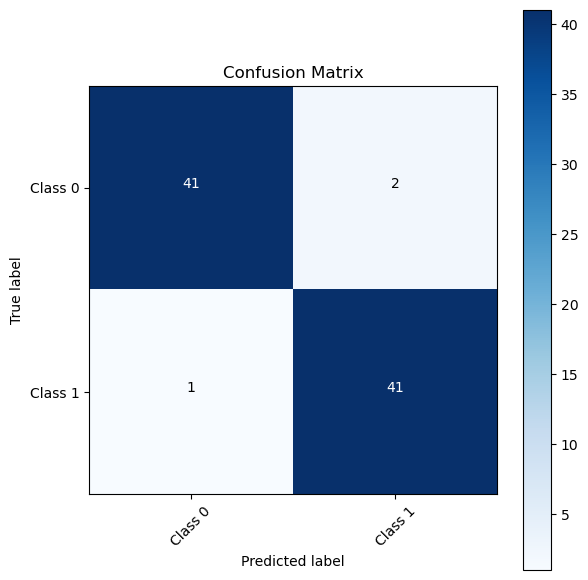

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.98      0.95      0.96        43
     Class 1       0.95      0.98      0.96        42

    accuracy                           0.96        85
   macro avg       0.96      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



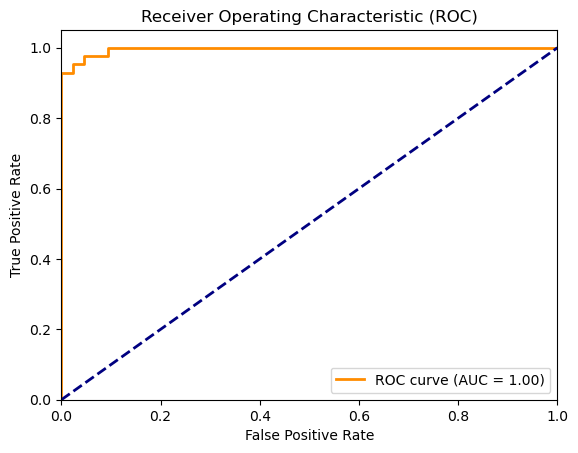

In [24]:
import itertools


model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        outputs = model(x_batch)  # shape: (batch_size, 2)
        y_pred = torch.argmax(outputs, dim=1)  # prediction
        all_preds.extend(y_pred.cpu().numpy())
        all_targets.extend(y_batch.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_targets, all_preds)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(output_dim)
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
plt.yticks(tick_marks, ['Class 0', 'Class 1'])

# annotation
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(all_targets, all_preds, target_names=['Class 0', 'Class 1']))

# ROC curve & AUC
if output_dim == 2:
    y_probs = []

    with torch.no_grad():
        for x_batch, _ in test_loader:
            outputs = model(x_batch)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # probabilità classe 1
            y_probs.extend(probs.cpu().numpy())

    fpr, tpr, _ = roc_curve(all_targets, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


Importance of the weights taken from the first layer:

                    Feature  Importance
23               area_worst    3.001924
20             radius_worst    2.893849
21            texture_worst    2.764697
6            concavity_mean    2.671933
13                  area_se    2.644181
2            perimeter_mean    2.590752
24         smoothness_worst    2.452412
0               radius_mean    2.411830
28           symmetry_worst    2.390406
17        concave points_se    2.311982
7       concave points_mean    2.275716
1              texture_mean    2.253835
10                radius_se    2.181021
12             perimeter_se    2.156612
22          perimeter_worst    2.122548
15           compactness_se    2.085733
5          compactness_mean    2.021369
11               texture_se    1.801407
27     concave points_worst    1.799823
8             symmetry_mean    1.795601
3                 area_mean    1.793203
19     fractal_dimension_se    1.780790
14            smoothness_se    1.764185
26          concavity_worst    1.661863


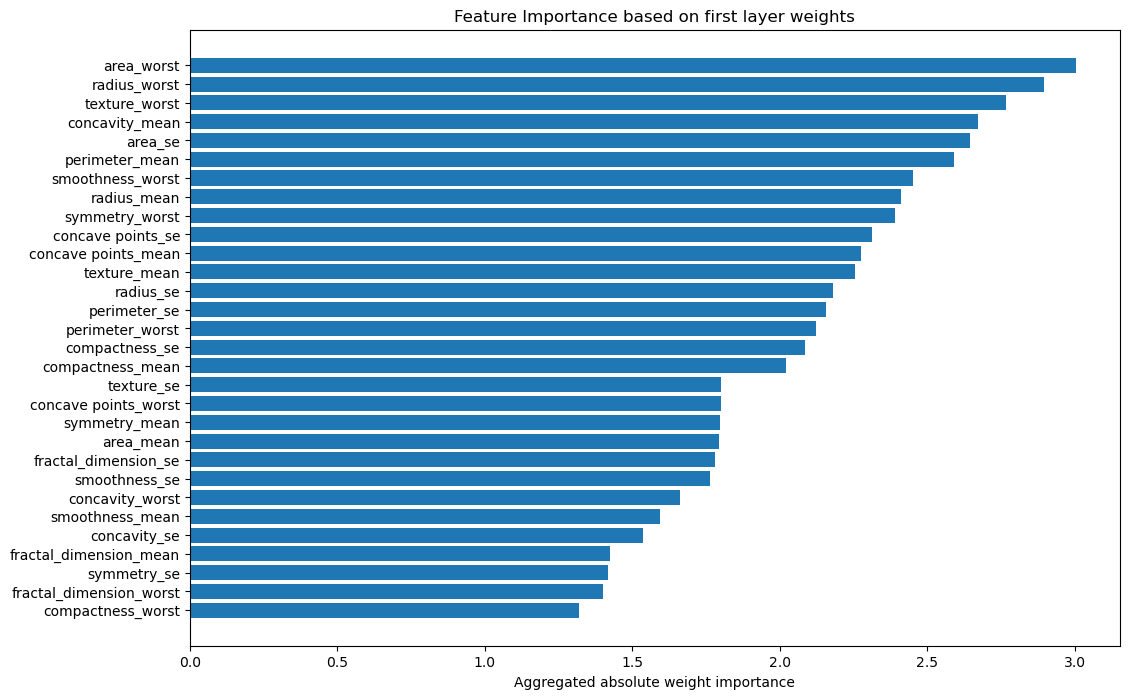

In [25]:
# Extract weights from the first layer (fc1)
# Shape: (hidden_units, input_units)
fc1_weights = model.fc1.weight.data.cpu().numpy()  # shape (64, 30)

# Aggregate importance per feature: sum of absolute weights across hidden units
feature_importance_values = np.sum(np.abs(fc1_weights), axis=0)  # shape (30,)

# feature names from your input dataframe
feature_names = X.columns

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_values
})

# Sort by absolute importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Aggregated absolute weight importance')
plt.title('Feature Importance based on first layer weights')
plt.gca().invert_yaxis()  # highest importance on top
plt.show()
